## Filtration method 2 : Affinity Graph

In [1]:
import networkx as nx
import numpy as np
import random
from utils import *

In [43]:
G0 = nx.gnm_random_graph(10,20)
for (u,v) in G0.edges():
    G0.edges[u,v]['time'] = random.randint(0,100)

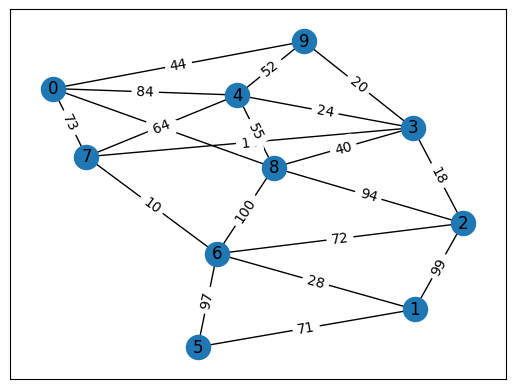

In [44]:
draw_with_labels(G0,'time')

In [47]:

def weighted_affinity(G0):
    vertex_list = range(G0.number_of_nodes())
    vertex_pairs = [(x, y) for x in vertex_list for y in vertex_list if x != y]
    edge_weight_dict = {}

    for pair in vertex_pairs:
        tr_paths = []
        paths = nx.all_simple_edge_paths(G0, source=pair[0], target=pair[1])
        if paths:
            for path in paths:
                time_list = {}
                for edge in path:
                    time_list[edge] = G0.edges[edge]['time']
                if all(list(time_list.values())[i] <= list(time_list.values())[i+1] for i in range(len(time_list) - 1)):
                    tr_paths.append(time_list)
        
        last_times = [list(d.values())[-1] for d in tr_paths]
        if last_times:
            t = min(last_times)
            edge_weight_dict[pair] = t
    
    new_dict = {}
    for key in edge_weight_dict.keys():
        a, b = key
        if (b, a) in edge_weight_dict:
            new_key = (a, b)
            new_value = max(edge_weight_dict[key], edge_weight_dict[(b, a)])
            new_dict[new_key] = new_value

    # Create an empty weighted graph
    G = nx.Graph()

    # Add edges from the dictionary with their weights
    for edge, weight in new_dict.items():
        G.add_edge(edge[0], edge[1], weight=weight)

    return G

In [48]:
G = weighted_affinity(G0)

## Algo for affinity graph

In [2]:
import networkx as nx
import heapq
import random

In [3]:
def time_respecting_paths(graph, start):
    priority_queue = []
    heapq.heappush(priority_queue, ( start, -float('inf'))) 
    shortest_paths = {vertex: float('inf') for vertex in graph.nodes}
    shortest_paths[start] = 0
    visited = set()
    while priority_queue:
        current_vertex, last_time = heapq.heappop(priority_queue)
        if (current_vertex, last_time) in visited:
            continue
        visited.add((current_vertex, last_time))
        for neighbor in graph.neighbors(current_vertex):
            edge_time = graph[current_vertex][neighbor]['time']
            if edge_time >= last_time:
                if edge_time < shortest_paths[neighbor]:
                    shortest_paths[neighbor] = edge_time
                    heapq.heappush(priority_queue, (neighbor, edge_time))
    
    return shortest_paths

In [4]:
def affinity_graph(G):
    n = G.number_of_nodes()
    T = []
    for i in range(n):
        T += [time_respecting_paths(G, i)]
    G_A = nx.complete_graph(n)
    for (u, v) in G_A.edges():
        G_A[u][v]['weight'] = min(float('inf'), max(T[u][v],T[v][u]))
    return G_A

In [25]:
G = nx.gnm_random_graph(100,2000)

for (u,v) in G.edges():
    G.edges[u,v]['time'] = random.randint(0,100)

{(0, 4): Text(-0.3205978464493311, -0.5547646784944202, '98'),
 (1, 4): Text(0.3067018050127478, 0.25935290326834665, '85'),
 (1, 3): Text(0.5767683726196151, 0.388712510974372, '56'),
 (2, 3): Text(0.5762614557659982, -0.19421156459675956, '99'),
 (2, 4): Text(0.30619488815913076, -0.3235711723027849, '4'),
 (3, 4): Text(0.19163105610088074, 0.01983025071718489, '87'),
 (3, 5): Text(0.08275657341541581, 0.3517594533336208, '16'),
 (4, 6): Text(-0.4927086873969435, 0.10292945871197681, '40'),
 (4, 5): Text(-0.18730999419145158, 0.22239984562759546, '68'),
 (5, 6): Text(-0.6015831700824084, 0.4348586613284128, '43')}

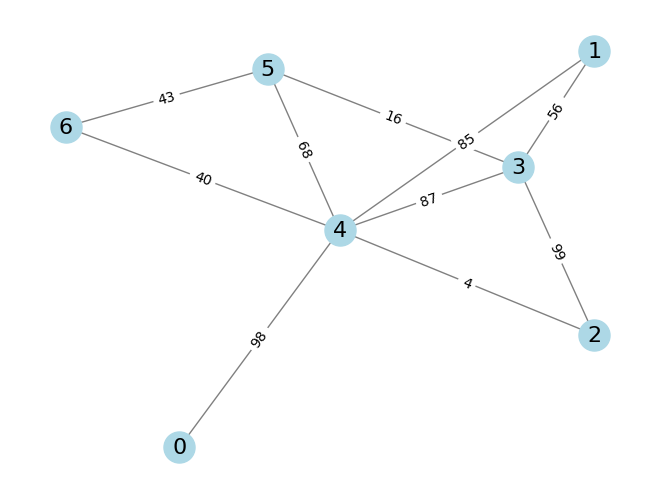

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
edge_labels = nx.get_edge_attributes(G, 'time')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [26]:
A = affinity_graph(G)

In [27]:
weights = nx.get_edge_attributes(A, 'weight')

In [28]:
weights

{(0, 1): 14,
 (0, 2): 13,
 (0, 3): 16,
 (0, 4): 1,
 (0, 5): 15,
 (0, 6): 13,
 (0, 7): 19,
 (0, 8): 13,
 (0, 9): 13,
 (0, 10): 13,
 (0, 11): 13,
 (0, 12): 13,
 (0, 13): 13,
 (0, 14): 13,
 (0, 15): 13,
 (0, 16): 13,
 (0, 17): 13,
 (0, 18): 13,
 (0, 19): 14,
 (0, 20): 13,
 (0, 21): 13,
 (0, 22): 13,
 (0, 23): 0,
 (0, 24): 13,
 (0, 25): 13,
 (0, 26): 13,
 (0, 27): 17,
 (0, 28): 13,
 (0, 29): 13,
 (0, 30): 13,
 (0, 31): 13,
 (0, 32): 13,
 (0, 33): 13,
 (0, 34): 13,
 (0, 35): 13,
 (0, 36): 13,
 (0, 37): 13,
 (0, 38): 14,
 (0, 39): 21,
 (0, 40): 13,
 (0, 41): 14,
 (0, 42): 13,
 (0, 43): 13,
 (0, 44): 13,
 (0, 45): 13,
 (0, 46): 13,
 (0, 47): 5,
 (0, 48): 13,
 (0, 49): 13,
 (0, 50): 14,
 (0, 51): 13,
 (0, 52): 14,
 (0, 53): 17,
 (0, 54): 13,
 (0, 55): 16,
 (0, 56): 13,
 (0, 57): 16,
 (0, 58): 14,
 (0, 59): 13,
 (0, 60): 13,
 (0, 61): 14,
 (0, 62): 13,
 (0, 63): 16,
 (0, 64): 13,
 (0, 65): 13,
 (0, 66): 14,
 (0, 67): 13,
 (0, 68): 13,
 (0, 69): 13,
 (0, 70): 13,
 (0, 71): 13,
 (0, 72): 13,
 (0,

In [29]:
(nx.adjacency_matrix(G,weight='time')).toarray()

array([[ 0,  0, 83, ..., 28, 62, 39],
       [ 0,  0,  0, ..., 52, 46,  0],
       [83,  0,  0, ...,  0, 83,  0],
       ...,
       [28, 52,  0, ...,  0,  0, 69],
       [62, 46, 83, ...,  0,  0,  0],
       [39,  0,  0, ..., 69,  0,  0]])

In [30]:
(nx.adjacency_matrix(A,weight='weight')).toarray()

array([[ 0, 14, 13, ..., 13, 13, 14],
       [14,  0, 14, ..., 11, 14, 10],
       [13, 14,  0, ..., 12, 16, 10],
       ...,
       [13, 11, 12, ...,  0, 16, 14],
       [13, 14, 16, ..., 16,  0, 14],
       [14, 10, 10, ..., 14, 14,  0]])